In [1]:
# installing dataset
!pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json
#! kaggle datasets list

!kaggle datasets download -d austinreese/craigslist-carstrucks-data
!unzip craigslist-carstrucks-data

Saving kaggle.json to kaggle.json
 96% 252M/262M [00:02<00:00, 138MB/s]
100% 262M/262M [00:02<00:00, 96.4MB/s]
Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('vehicles.csv')

In [4]:
# meeting the dataset, data types, number of rows/columns
df.info()
df.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


 **INITIAL CLEANUP**

 In this part I will remove columns that are not important for this project.
 Those columns are mostly IDs, URLs, empty columns (size).

 I will also remove duplicates from the dataframe

In [5]:
# dropping initially some columns that won't be needed for analysing (either not relevant for the problem, empty, too many data missing)
df=df.drop(['id','url','region_url','VIN','paint_color','image_url'
           ,'description','county','posting_date','size'],axis=1)

In [6]:
# checking for duplicates
df.duplicated().sum()

55347

In [7]:
df=df.drop_duplicates()
df.shape

(371533, 16)

**HANDLING MISSING VALUES**

Some columns have very little missing data so we can just remove those rows.
For longitude and latitude I have calculated missing data based on the state.
For other columns I have created new category: "unknown"

In [8]:
df.isna().sum()

region               0
price                0
year               986
manufacturer     15269
model             4687
condition       142074
cylinders       151484
fuel              2446
odometer          3422
title_status      6706
transmission      2059
drive           112813
type             79103
state                0
lat               6232
long              6232
dtype: int64

In [9]:
# dealing with missing values
# removing rows with missing values 
df.dropna(subset=['year'], inplace=True)
df.dropna(subset=['manufacturer'], inplace=True)
df.dropna(subset=['model'], inplace=True)
df.dropna(subset=['odometer'], inplace=True)
df.dropna(subset=['fuel'],inplace=True)
df.dropna(subset=['title_status'],inplace=True)
df.dropna(subset=['transmission'],inplace=True)

# filling missing longitude and latitude based on the state
df['long']=df.groupby('state')['long'].transform(lambda x: x.fillna(x.dropna().sample(n=1).values[0]))
df['lat']=df.groupby('state')['lat'].transform(lambda x: x.fillna(x.dropna().sample(n=1).values[0]))

df.isna().sum()

region               0
price                0
year                 0
manufacturer         0
model                0
condition       128450
cylinders       137891
fuel                 0
odometer             0
title_status         0
transmission         0
drive           100133
type             70438
state                0
lat                  0
long                 0
dtype: int64

In [10]:
# CYLINDER
print(df['cylinders'].value_counts())
cylinders_mode = df['cylinders'].mode().iloc[0]
print("Mode: {}".format(cylinders_mode))

6 cylinders     77852
4 cylinders     61315
8 cylinders     59245
5 cylinders      1339
10 cylinders     1166
other             764
3 cylinders       444
12 cylinders      101
Name: cylinders, dtype: int64
Mode: 6 cylinders


In [11]:
df=df[df['cylinders'] != 'other']
df['cylinders'] = df['cylinders'].fillna(cylinders_mode)
df['cylinders'] = df['cylinders'].str.extract('(\d+)')
df['cylinders'].value_counts()

<ipython-input-11-e77be59c9f6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cylinders'] = df['cylinders'].fillna(cylinders_mode)


6     215743
4      61315
8      59245
5       1339
10      1166
3        444
12       101
Name: cylinders, dtype: int64

In [12]:
df.fillna('unknown',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339353 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        339353 non-null  object 
 1   price         339353 non-null  int64  
 2   year          339353 non-null  float64
 3   manufacturer  339353 non-null  object 
 4   model         339353 non-null  object 
 5   condition     339353 non-null  object 
 6   cylinders     339353 non-null  object 
 7   fuel          339353 non-null  object 
 8   odometer      339353 non-null  float64
 9   title_status  339353 non-null  object 
 10  transmission  339353 non-null  object 
 11  drive         339353 non-null  object 
 12  type          339353 non-null  object 
 13  state         339353 non-null  object 
 14  lat           339353 non-null  float64
 15  long          339353 non-null  float64
dtypes: float64(4), int64(1), object(11)
memory usage: 44.0+ MB


**DATA TYPE**

Checking data type of columns and number of categories

In [13]:
# REGION
df['region'].value_counts()

# categorical ,404 different values

minneapolis / st paul    2714
portland                 2714
sacramento               2674
columbus                 2670
seattle-tacoma           2658
                         ... 
meridian                   19
southwest MS               13
fort smith, AR              8
kansas city                 8
west virginia (old)         7
Name: region, Length: 404, dtype: int64

In [14]:
# YEAR 
print(df['year'].value_counts())
df['year']=df['year'].astype(int)

2018.0    30956
2017.0    29498
2015.0    24623
2013.0    23933
2014.0    23779
          ...  
1915.0        1
1905.0        1
1922.0        1
1918.0        1
1945.0        1
Name: year, Length: 107, dtype: int64


In [15]:
# MANUFACTURER
df['manufacturer'].value_counts()

# categorical ,possibly sellect 10 models with the highest frequency

ford               58683
chevrolet          45326
toyota             28346
honda              17684
jeep               15503
nissan             15270
ram                14236
gmc                13947
bmw                12671
dodge              10827
mercedes-benz       9932
hyundai             8248
volkswagen          8171
subaru              8017
lexus               7034
kia                 6833
audi                6692
cadillac            5774
acura               5423
chrysler            4954
buick               4675
mazda               4569
infiniti            4290
lincoln             3670
volvo               2898
mitsubishi          2733
mini                2037
pontiac             1983
jaguar              1800
rover               1548
porsche             1151
mercury              990
saturn               914
alfa-romeo           858
tesla                727
fiat                 676
harley-davidson       98
ferrari               68
datsun                61
aston-martin          21


In [16]:
most_frequent_manufacturers = df['manufacturer'].value_counts().head(10).index.tolist()

In [17]:
# MODEL
df['model'].value_counts()

# categorical, 21788 different model types

f-150                      6428
silverado 1500             4137
1500                       3342
camry                      2505
silverado                  2486
                           ... 
silverado lt double           1
wrangler x virgin stock       1
rogue s awd 4dr               1
regal cxl rl6                 1
gand wagoneer                 1
Name: model, Length: 21788, dtype: int64

In [18]:
df[df['manufacturer'].isin(most_frequent_manufacturers)].model.value_counts()

# 13567 models with top 10 manufacturers 

f-150                        6428
silverado 1500               4137
1500                         3342
camry                        2505
silverado                    2486
                             ... 
rav4 2.5l le crossover          1
x3 3.0i 4x4                     1
535xi awd twin turbo 4-dr       1
x1 28i/awd/nav                  1
gand wagoneer                   1
Name: model, Length: 13567, dtype: int64

In [19]:
df['condition'].value_counts()

# categorical, 7 different conditions

unknown      128144
good         110273
excellent     76535
like new      17191
fair           5760
new             944
salvage         506
Name: condition, dtype: int64

In [20]:
# CYLINDER
print(df['cylinders'].value_counts())
# categorical

6     215743
4      61315
8      59245
5       1339
10      1166
3        444
12       101
Name: cylinders, dtype: int64


In [21]:
# ODOMETER
print(df['odometer'].tail(20))
df['odometer']=df['odometer'].astype(int)

426855    64267.0
426857    36630.0
426858     6814.0
426859     7701.0
426860    41664.0
426861     3883.0
426864    53475.0
426865     2498.0
426866    55612.0
426867    16841.0
426870     3066.0
426871    34239.0
426872    19059.0
426873    15080.0
426874    30814.0
426875    32226.0
426876    12029.0
426877     4174.0
426878    30112.0
426879    22716.0
Name: odometer, dtype: float64


In [22]:
# FUEL
df['fuel'].value_counts()

# categorical, 5 different fuels

gas         285918
other        26236
diesel       21394
hybrid        4479
electric      1326
Name: fuel, dtype: int64

In [23]:
# TITLE STATUS
df['title_status'].value_counts()

# categorical, 6 different status

clean         327753
rebuilt         6328
salvage         3319
lien            1285
missing          537
parts only       131
Name: title_status, dtype: int64

In [24]:
# TRANSMISSION
df['transmission'].value_counts()

# categorical, 3 different transmissions

automatic    262389
other         58272
manual        18692
Name: transmission, dtype: int64

In [25]:
# DRIVE
df['drive'].value_counts()

# categorical, 4 different drives

4wd        106187
unknown     99995
fwd         85534
rwd         47637
Name: drive, dtype: int64

In [26]:
# TYPE
df['type'].value_counts()

# categorical, 14 different types

unknown        70348
sedan          70096
SUV            61802
pickup         36531
truck          27248
other          17843
coupe          15677
hatchback      13587
wagon           8632
van             6602
convertible     6151
mini-van        4048
offroad          517
bus              271
Name: type, dtype: int64

**ANALYSIS**

Checking correlation between features, removing outliers, plotting distribution and relations 

In [27]:
df.describe()

# huge std in price and odometry (outliers)
# year range: 1900 - 2022 (perhaps focus on latest years)

,price,year,odometer,lat,long
count,3.393530e+05,339353.000000,3.393530e+05,339353.000000,339353.000000
mean,7.114821e+04,2011.496448,9.504156e+04,38.442258,-94.001386
std,1.226703e+07,8.909024,1.839595e+05,5.665385,17.953487
min,0.000000e+00,1900.000000,0.000000e+00,-81.838232,-159.827728
25%,6.000000e+03,2008.000000,3.596500e+04,34.690900,-110.571456
50%,1.459900e+04,2014.000000,8.360000e+04,39.105930,-87.871739
75%,2.699000e+04,2017.000000,1.330000e+05,42.328013,-80.600000
max,3.736929e+09,2022.000000,1.000000e+07,82.252826,173.885502


In [28]:
print(df['price'].sort_values().tail(15))
print(df['price'].sort_values().head(15))

# some values are too high and some seem random (1111111111, 123456789)
# a lot of values are 0

136516      17000000
379133      25003000
1838        99999999
288356     123456789
193736     123456789
137807     123456789
307488     123456789
230753     135008900
29386     1111111111
153082    1234567890
184704    1410065407
91576     3024942282
257840    3024942282
318592    3736928711
356716    3736928711
Name: price, dtype: int64
274615    0
26383     0
100733    0
100734    0
26376     0
100735    0
100736    0
26370     0
100738    0
100739    0
100740    0
26386     0
100741    0
403180    0
403174    0
Name: price, dtype: int64


In [29]:
print(df['odometer'].sort_values().tail(15))
print(df['odometer'].sort_values().head(15))

305172    10000000
320410    10000000
9218      10000000
391620    10000000
105059    10000000
108102    10000000
386654    10000000
34717     10000000
152394    10000000
262338    10000000
44280     10000000
208157    10000000
320461    10000000
149788    10000000
260971    10000000
Name: odometer, dtype: int64
213224    0
4536      0
142869    0
122725    0
76359     0
245619    0
334242    0
208293    0
360223    0
4535      0
322252    0
143032    0
241005    0
38189     0
322268    0
Name: odometer, dtype: int64


<Axes: >

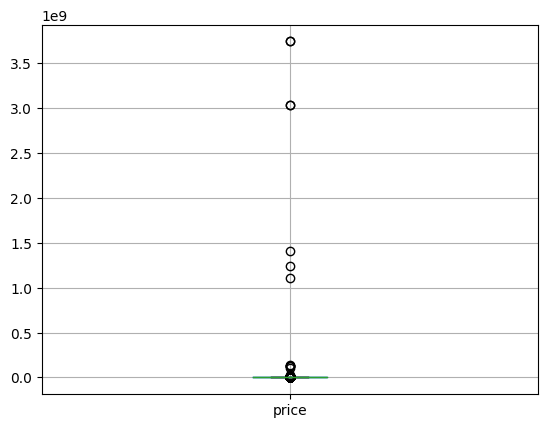

In [30]:
df.boxplot(column=['price'])

# many outliers

<Axes: >

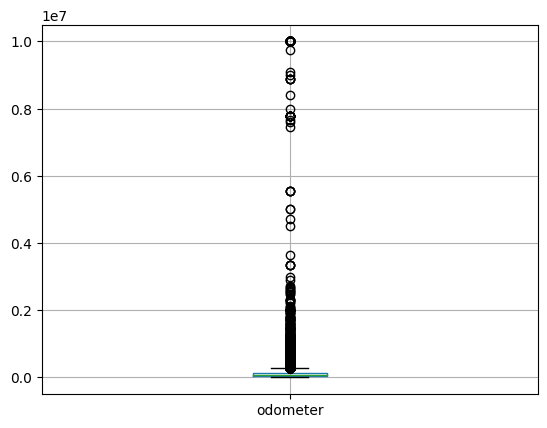

In [31]:
df.boxplot(column=['odometer'])

# many outliers

In [32]:
# Interquartile Range Method for removing outliers
MIN = 500

price_q_25, price_q_75 = df['price'].quantile(0.25), df['price'].quantile(0.75)
price_iqr = price_q_75 - price_q_25

price_cut_off = price_iqr * 1.5
price_lower = price_q_25 - price_cut_off
price_upper = price_q_75 + price_cut_off

df = df[(df['price'] < price_upper) & (df['price'] > price_lower) & (df['price']>MIN)]

odometer_q_25, odometer_q_75 = df['odometer'].quantile(0.25), df['odometer'].quantile(0.75)
odometer_iqr = odometer_q_75 - odometer_q_25

odometer_cut_off = odometer_iqr * 1.5
odometer_lower = odometer_q_25 - odometer_cut_off
odometer_upper =odometer_q_75 + odometer_cut_off

df = df[(df['odometer'] < odometer_upper) & (df['odometer'] > odometer_lower)]

In [33]:
df.describe()

,price,year,odometer,lat,long
count,302989.000000,302989.000000,302989.000000,302989.000000,302989.000000
mean,18575.583378,2011.285360,91248.069791,38.440565,-93.409798
std,12636.155804,8.889715,61632.607298,5.654643,17.546776
min,501.000000,1900.000000,0.000000,-81.838232,-159.719900
25%,7900.000000,2008.000000,36980.000000,34.705500,-106.189091
50%,15995.000000,2013.000000,86000.000000,39.186473,-87.322254
75%,27900.000000,2017.000000,135000.000000,42.285928,-80.440000
max,58448.000000,2022.000000,284918.000000,82.252826,167.629911


<Axes: >

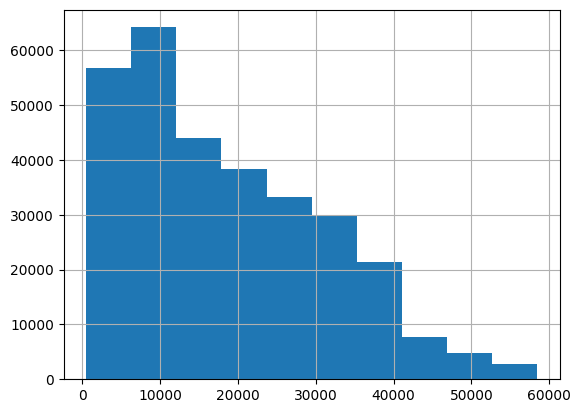

In [34]:
# price distribution after removing outliers
df['price'].hist()

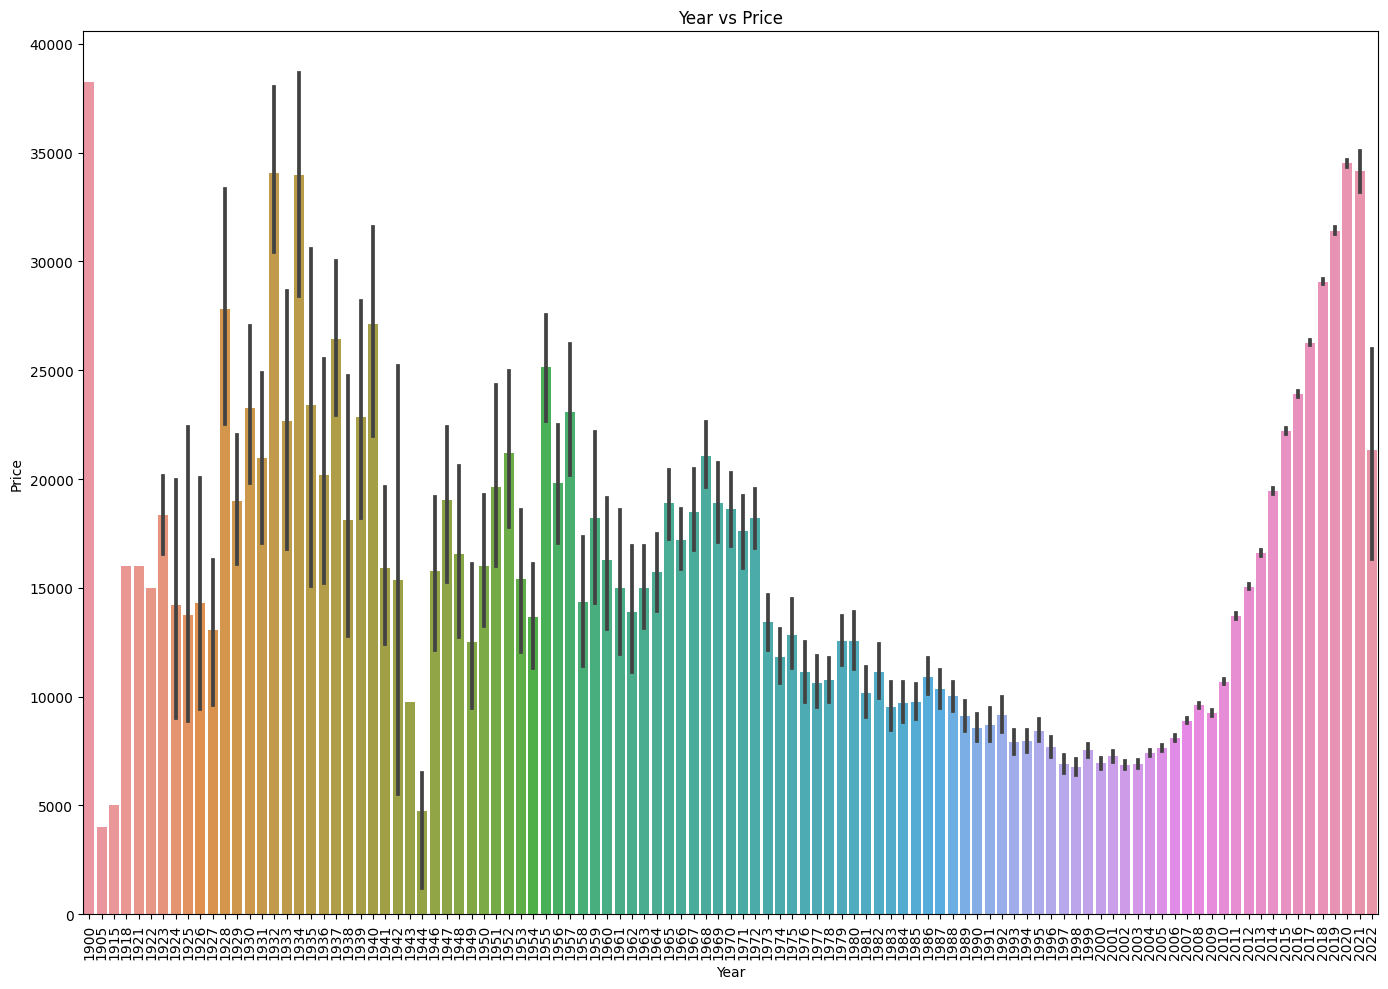

In [35]:
# year / price
plt.figure(figsize =(14,10))
sns.barplot(x='year', y='price', data=df)
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Year vs Price')
plt.tight_layout()

In [36]:
# extracting data from 2000 onwards and adding new column that represents age

df = df[df['year']>=2000]
df['age']= 2023 - df['year']
df=df.drop(['year'],axis=1)

<ipython-input-36-bae167bb9ad4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']= 2023 - df['year']


<Axes: xlabel='long', ylabel='lat'>

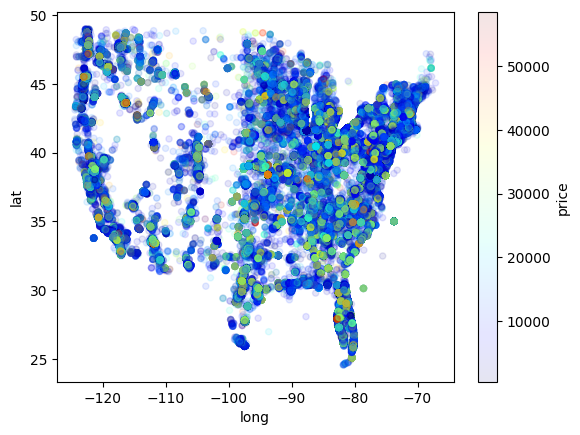

In [37]:
# geographical location / price
# USA
longitude_min, longitude_max = -125.0, -65.0
latitude_min, latitude_max = 24.0, 50.0
df_usa = df[(df['long'] >= longitude_min) & (df['long'] <= longitude_max) &
                   (df['lat'] >= latitude_min) & (df['lat'] <= latitude_max)]
df_usa.plot(kind="scatter",x="long",y="lat",alpha=0.1,
                   c="price",cmap=plt.get_cmap("jet"))

             price  odometer       lat      long       age
price     1.000000 -0.589712 -0.028172 -0.052203 -0.653246
odometer -0.589712  1.000000  0.054110 -0.001329  0.690592
lat      -0.028172  0.054110  1.000000 -0.097892  0.052895
long     -0.052203 -0.001329 -0.097892  1.000000 -0.000718
age      -0.653246  0.690592  0.052895 -0.000718  1.000000


<ipython-input-38-187ef3649071>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

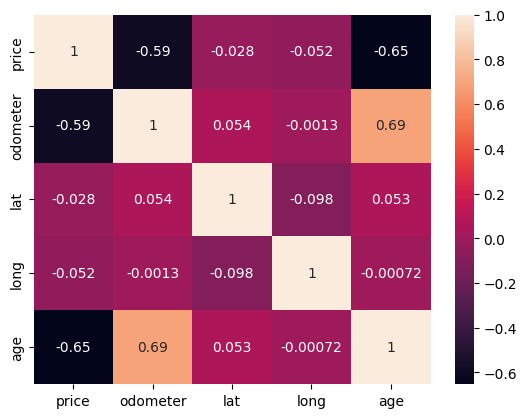

In [38]:
# correlations (numerical only)
corr = df.corr()
print(corr)
sns.heatmap(corr,annot=True)

# not a very significant correlation between lat,long and price
# there is a high correlation between odometer and age

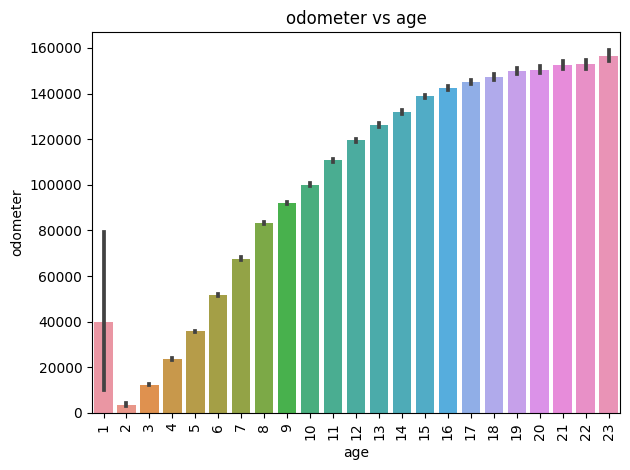

In [39]:
# Checking coorelation between age and odometer
sns.barplot(x='age',y='odometer',data=df)
plt.xlabel('age')
plt.xticks(rotation=90)
plt.ylabel('odometer')
plt.title('odometer vs age')
plt.tight_layout()

In [40]:
subset=df[df['age']==1]
subset['odometer'].sort_values().tail(20)
#some values seem random (12345) and too high

167095         1
404296        10
403442        10
68977         10
165048        10
403267        10
403565        10
402410        10
402550        10
402735        10
403000        10
403150        10
233401      1000
242994     12345
316626    139700
255853    178000
65612     180000
43183     207834
Name: odometer, dtype: int64

In [41]:
# removing outliers
odometer_q_25, odometer_q_75 = subset['odometer'].quantile(0.25), subset['odometer'].quantile(0.75)
odometer_iqr = odometer_q_75 - odometer_q_25

odometer_cut_off = odometer_iqr * 1.5
odometer_lower = odometer_q_25 - odometer_cut_off
odometer_upper =odometer_q_75 + odometer_cut_off

df = df[~((df['age'] == 1) & ((df['odometer'] < odometer_lower) | (df['odometer'] > odometer_upper)))]


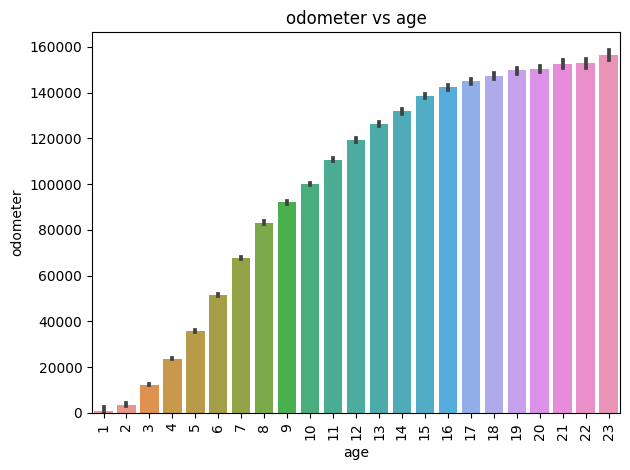

In [42]:
# odometer vs age after removing outliers
sns.barplot(x='age',y='odometer',data=df)
plt.xlabel('age')
plt.xticks(rotation=90)
plt.ylabel('odometer')
plt.title('odometer vs age')
plt.tight_layout()

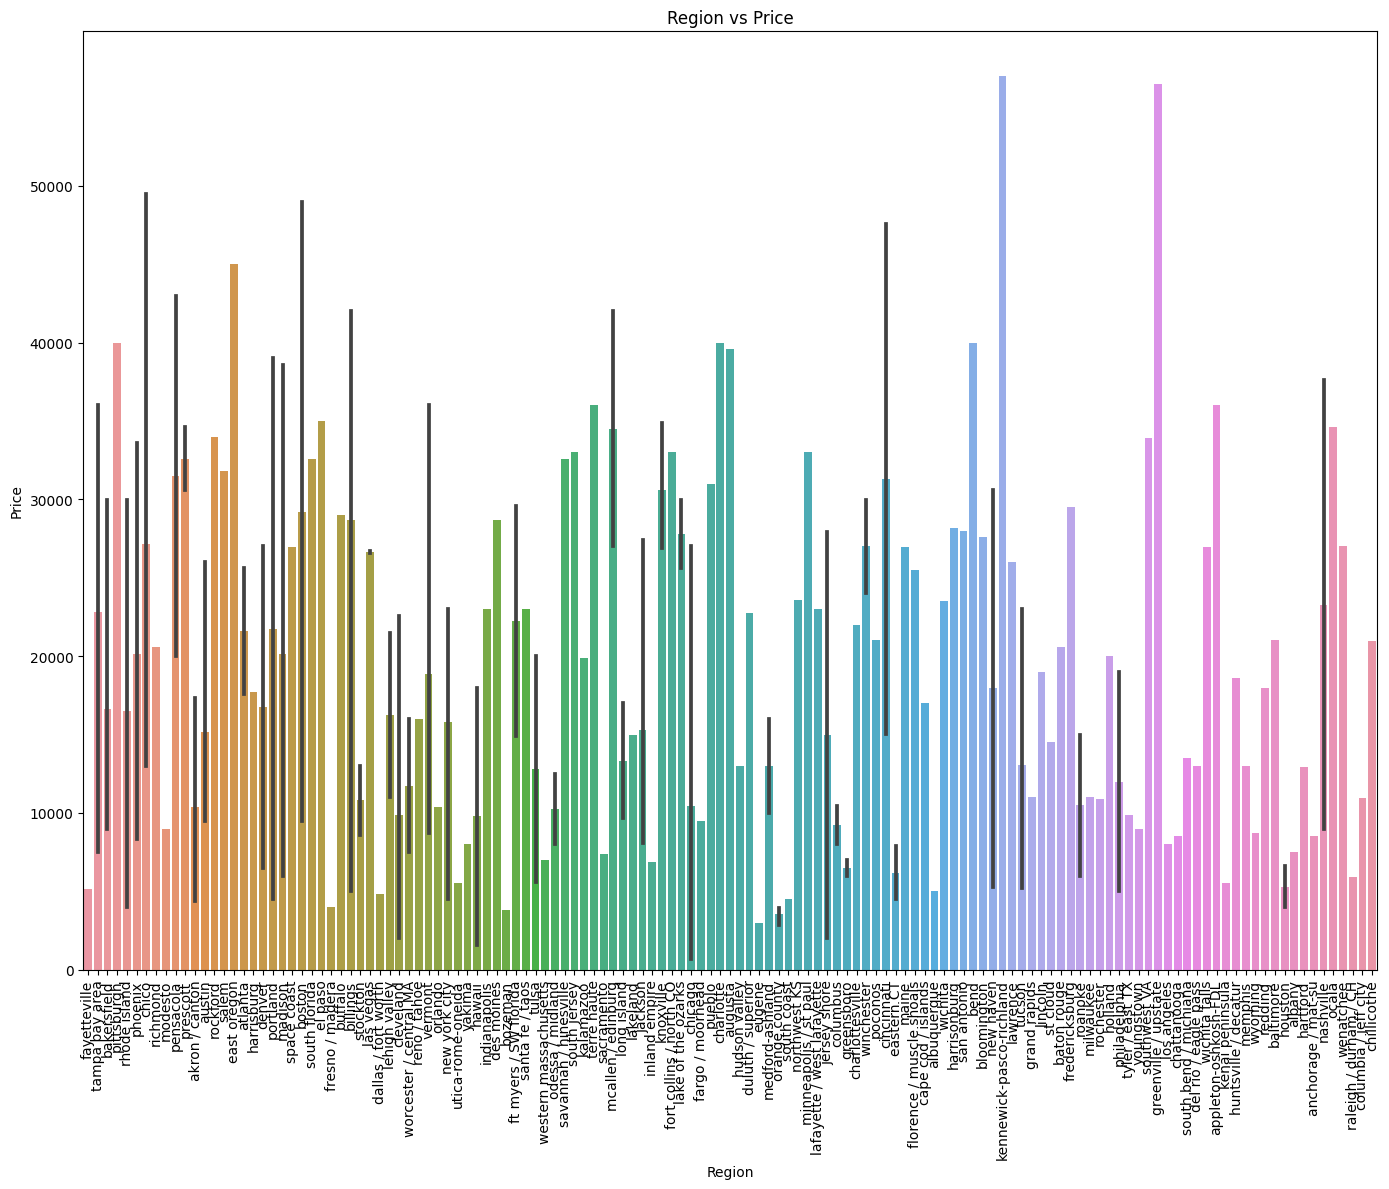

In [43]:
# region / price
plt.figure(figsize =(14,12))
sns.barplot(x='region', y='price', data=df.sample(200))
plt.xlabel('Region')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Region vs Price')
plt.tight_layout()

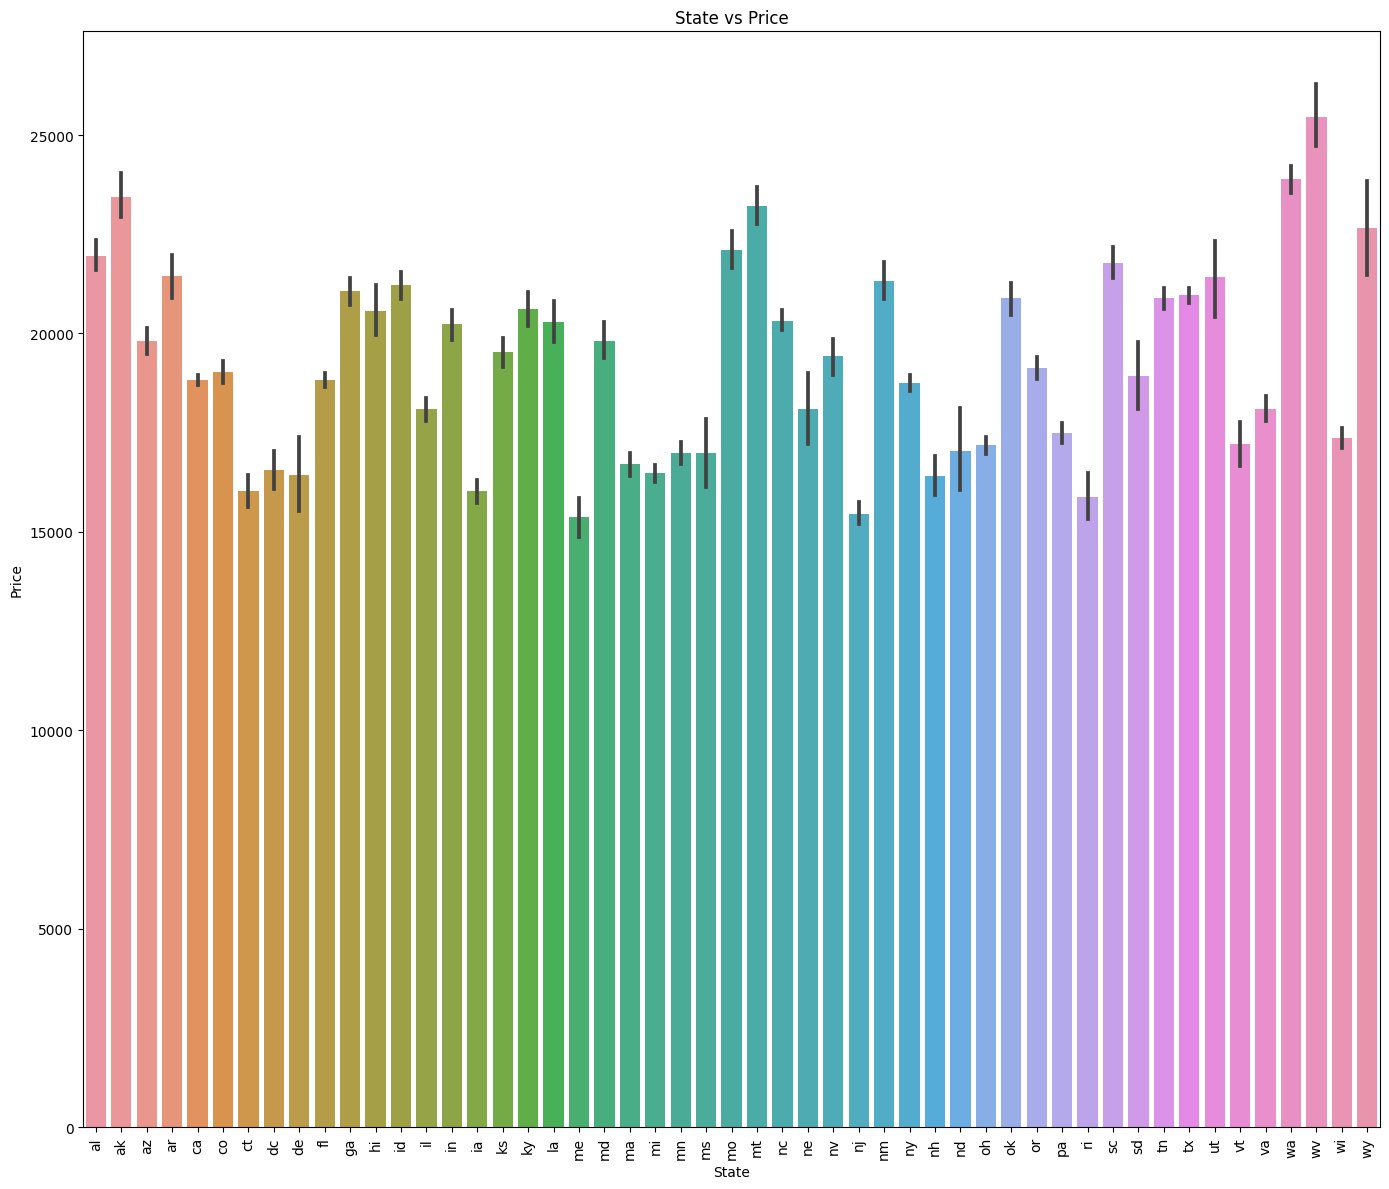

In [44]:
# state / price
plt.figure(figsize =(14,12))
sns.barplot(x='state', y='price', data=df)
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('State vs Price')
plt.tight_layout()

In [45]:
df = df.drop(['state','region','long','lat'],axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285753 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         285753 non-null  int64 
 1   manufacturer  285753 non-null  object
 2   model         285753 non-null  object
 3   condition     285753 non-null  object
 4   cylinders     285753 non-null  object
 5   fuel          285753 non-null  object
 6   odometer      285753 non-null  int64 
 7   title_status  285753 non-null  object
 8   transmission  285753 non-null  object
 9   drive         285753 non-null  object
 10  type          285753 non-null  object
 11  age           285753 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 28.3+ MB


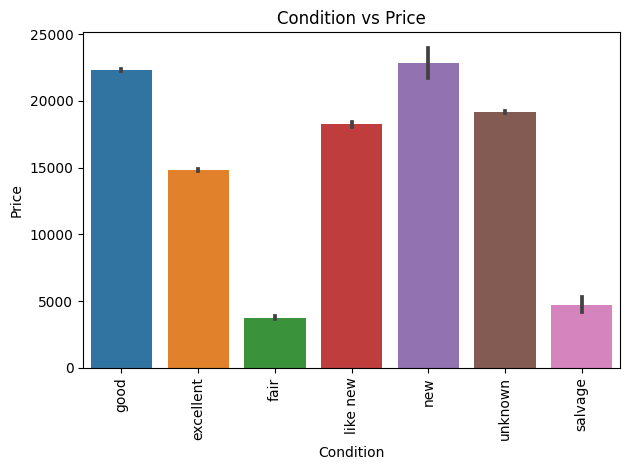

In [47]:
# condition / price
sns.barplot(x='condition', y='price', data=df)
plt.xlabel('Condition')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Condition vs Price')
plt.tight_layout()

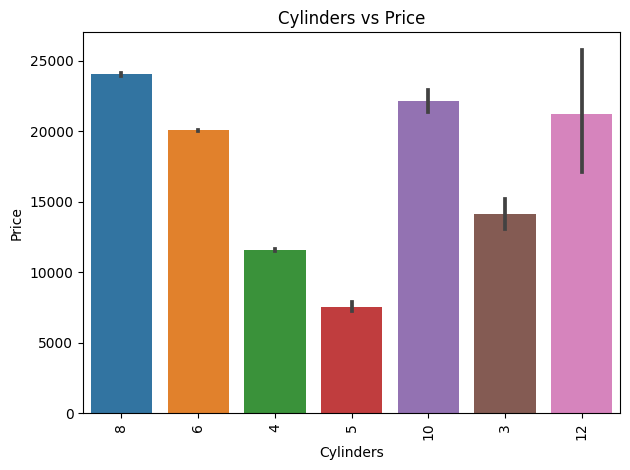

In [48]:
# cylinders / price
sns.barplot(x='cylinders', y='price', data=df)
plt.xlabel('Cylinders')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Cylinders vs Price')
plt.tight_layout()

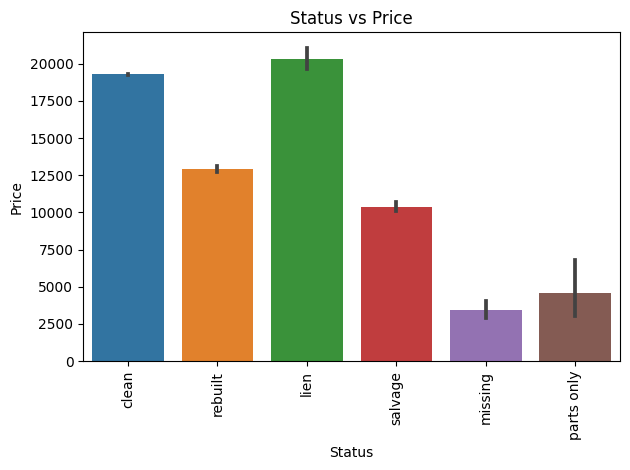

In [49]:
# title_status / price
sns.barplot(x='title_status', y='price', data=df)
plt.xlabel('Status')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Status vs Price')
plt.tight_layout()

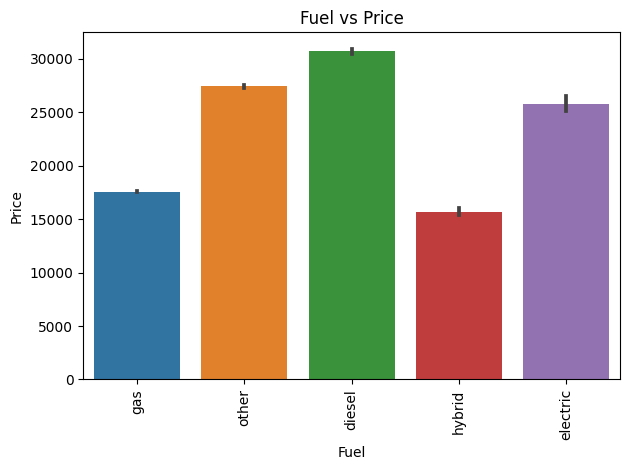

In [50]:
# fuel / price
sns.barplot(x='fuel', y='price', data=df)
plt.xlabel('Fuel')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Fuel vs Price')
plt.tight_layout()

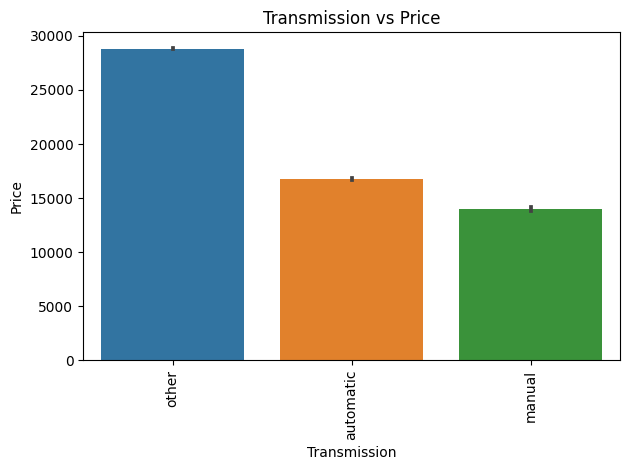

In [51]:
# transmission / price
sns.barplot(x='transmission', y='price', data=df)
plt.xlabel('Transmission')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Transmission vs Price')
plt.tight_layout()

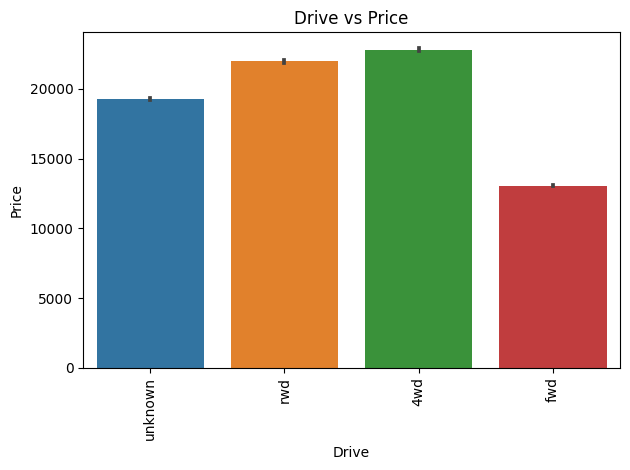

In [52]:
# drive / price
sns.barplot(x='drive', y='price', data=df)
plt.xlabel('Drive')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Drive vs Price')
plt.tight_layout()

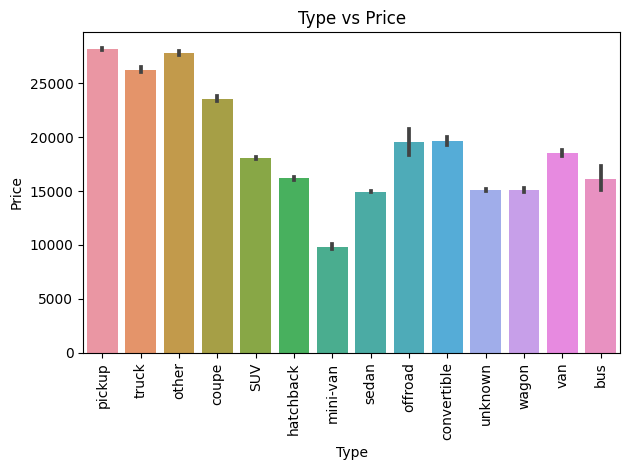

In [53]:
# type / price
sns.barplot(x='type', y='price', data=df)
plt.xlabel('Type')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Type vs Price')
plt.tight_layout()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'pickup'),
  Text(1, 0, 'truck'),
  Text(2, 0, 'other'),
  Text(3, 0, 'coupe'),
  Text(4, 0, 'SUV'),
  Text(5, 0, 'hatchback'),
  Text(6, 0, 'mini-van'),
  Text(7, 0, 'sedan'),
  Text(8, 0, 'offroad'),
  Text(9, 0, 'convertible'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'wagon'),
  Text(12, 0, 'van'),
  Text(13, 0, 'bus')])

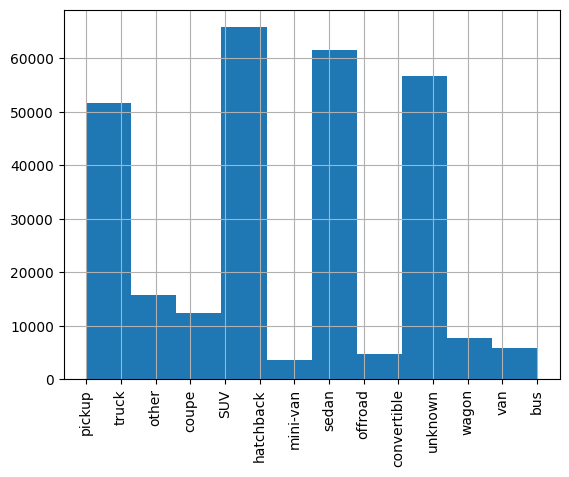

In [54]:
df['type'].hist()
plt.xticks(rotation=90)


In [55]:
df=df.drop(['type'],axis=1)

**DATA PREPARATION**

In [56]:
# taking top 5 most frequent manufacturers
most_frequent_manufacturers = df['manufacturer'].value_counts().head(5).index.tolist()
df_p=df[df['manufacturer'].isin(most_frequent_manufacturers)]

In [57]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136841 entries, 28 to 426875
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         136841 non-null  int64 
 1   manufacturer  136841 non-null  object
 2   model         136841 non-null  object
 3   condition     136841 non-null  object
 4   cylinders     136841 non-null  object
 5   fuel          136841 non-null  object
 6   odometer      136841 non-null  int64 
 7   title_status  136841 non-null  object
 8   transmission  136841 non-null  object
 9   drive         136841 non-null  object
 10  age           136841 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 12.5+ MB


In [58]:
most_frequent_manufacturers

['ford', 'chevrolet', 'toyota', 'honda', 'nissan']

In [59]:
mask = df_p['model'].map(df_p['model'].value_counts()) >= 1000
df_p = df_p[mask]

In [60]:
df_p['model'].value_counts()

f-150               5283
silverado 1500      3431
camry               2088
accord              2088
civic               2019
escape              1972
silverado           1909
altima              1882
explorer            1731
tacoma              1714
corolla             1466
equinox             1407
cr-v                1355
focus               1325
fusion              1304
mustang             1267
rav4                1169
malibu              1164
odyssey             1162
impala              1130
prius               1115
cruze               1109
tahoe               1097
silverado 2500hd    1020
tundra              1002
Name: model, dtype: int64

In [61]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42209 entries, 28 to 426853
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         42209 non-null  int64 
 1   manufacturer  42209 non-null  object
 2   model         42209 non-null  object
 3   condition     42209 non-null  object
 4   cylinders     42209 non-null  object
 5   fuel          42209 non-null  object
 6   odometer      42209 non-null  int64 
 7   title_status  42209 non-null  object
 8   transmission  42209 non-null  object
 9   drive         42209 non-null  object
 10  age           42209 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 3.9+ MB


In [62]:
df_p['condition'].value_counts()

unknown      21071
excellent    11452
good          6658
like new      2206
fair           674
new             76
salvage         72
Name: condition, dtype: int64

In [63]:
df_p['cylinders'].value_counts()

6     23124
4     12469
8      6551
3        46
5        15
10        4
Name: cylinders, dtype: int64

In [64]:
df_p['cylinders'] = df_p['cylinders'].replace(['3','5','10'], 'other')

In [65]:
df_p['fuel'].value_counts()

gas         39342
other        1164
hybrid        995
diesel        682
electric       26
Name: fuel, dtype: int64

<Axes: >

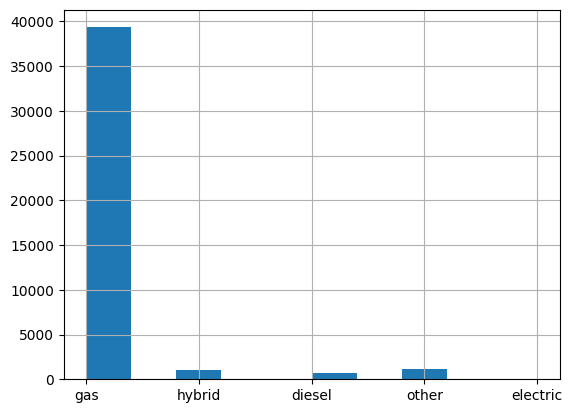

In [66]:
df_p['fuel'].hist()

In [67]:
df_p['title_status'].value_counts()

clean         40412
rebuilt         966
salvage         596
lien            198
missing          24
parts only       13
Name: title_status, dtype: int64

<Axes: >

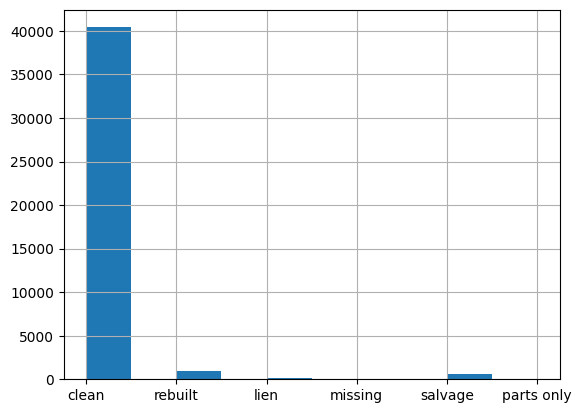

In [68]:
df_p['title_status'].hist()

In [69]:
df_p=df_p.drop(['fuel','title_status'],axis=1)

In [70]:
df_p['transmission'].value_counts()

automatic    40032
manual        1612
other          565
Name: transmission, dtype: int64

In [71]:
df_p['drive'].value_counts()

fwd        15077
4wd        13328
unknown    10313
rwd         3491
Name: drive, dtype: int64

In [72]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42209 entries, 28 to 426853
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         42209 non-null  int64 
 1   manufacturer  42209 non-null  object
 2   model         42209 non-null  object
 3   condition     42209 non-null  object
 4   cylinders     42209 non-null  object
 5   odometer      42209 non-null  int64 
 6   transmission  42209 non-null  object
 7   drive         42209 non-null  object
 8   age           42209 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 3.2+ MB


In [73]:
# one hot encoding categorical features
categorical_columns = ['manufacturer', 'model', 'condition','cylinders','transmission','drive']
df_encoded = pd.get_dummies(df_p[categorical_columns])
df_encoded = pd.concat([df_p.drop(categorical_columns, axis=1), df_encoded], axis=1)

In [74]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42209 entries, 28 to 426853
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   price                   42209 non-null  int64
 1   odometer                42209 non-null  int64
 2   age                     42209 non-null  int64
 3   manufacturer_chevrolet  42209 non-null  uint8
 4   manufacturer_ford       42209 non-null  uint8
 5   manufacturer_honda      42209 non-null  uint8
 6   manufacturer_nissan     42209 non-null  uint8
 7   manufacturer_toyota     42209 non-null  uint8
 8   model_accord            42209 non-null  uint8
 9   model_altima            42209 non-null  uint8
 10  model_camry             42209 non-null  uint8
 11  model_civic             42209 non-null  uint8
 12  model_corolla           42209 non-null  uint8
 13  model_cr-v              42209 non-null  uint8
 14  model_cruze             42209 non-null  uint8
 15  model_equinox    

In [75]:
# standardization of numerical features
numerical_columns = ['odometer', 'age']
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

In [76]:
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures


# Split data into train and test
Y = df_encoded.iloc[:, 0]
X = df_encoded.iloc[:,1:]

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=10)


def evaluate(ytest,ytest_pred):
  MSE = mean_squared_error(ytest,ytest_pred)
  MAE = mean_absolute_error(ytest,ytest_pred)
  R2 = r2_score(ytest,ytest_pred)
  
  return MSE,MAE,R2

def residuals(ytest,ytest_pred):
  performance=pd.DataFrame({'Model predictions':ytest_pred,'Test values':ytest})
  performance['error']=performance['Model predictions']-performance['Test values']

  performance.reset_index(drop=True,inplace=True)
  performance.reset_index(inplace=True)

  sample=performance.sample(30)
  x = np.arange(len(sample))

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - 0.1, sample['Model predictions'], 0.2, label='Model predictions')
  rects2 = ax.bar(x + 0.1, sample['Test values'], 0.2, label='Test values')

  ax.set_ylabel('Values')
  ax.set_xlabel('Index')
  ax.set_xticks(x)
  ax.legend()

  fig.tight_layout()
  print(performance.sample(20))

  


**LINEAR REGRESSION**

The linear regression model performance: MSE -> 27736962.112201888, R2 -> 0.786668459666249, MAE -> 3704.4841269841268
       index  Model predictions  Test values      error
4096    4096          26397.750        34995  -8597.250
11194  11194          34756.625        47995 -13238.375
129      129          24421.750        18900   5521.750
1106    1106          18305.250        12500   5805.250
3394    3394          24615.250        22900   1715.250
1366    1366          11522.875        11289    233.875
12300  12300          23983.250        19500   4483.250
8803    8803          34682.250        53995 -19312.750
9081    9081          16669.250        11895   4774.250
9167    9167          34094.125        37900  -3805.875
4212    4212          14788.375        13900    888.375
6537    6537          19447.375        15995   3452.375
11866  11866          20975.750        24991  -4015.250
5453    5453           6413.375         8995  -2581.625
7881    7881          22180.250        21

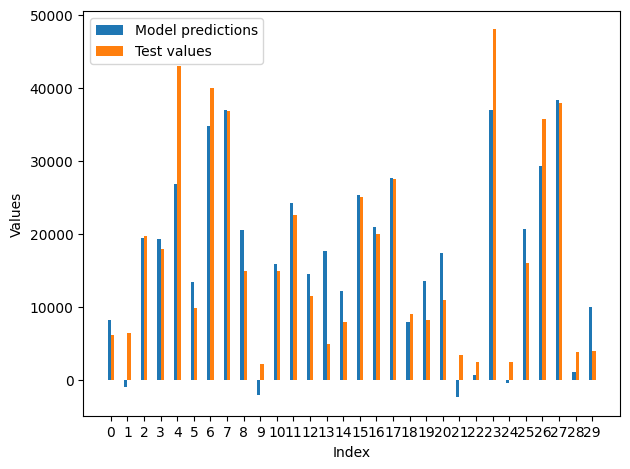

In [77]:
LGmodel=lm.LinearRegression()
LGmodel.fit(xtrain,ytrain)

ytest_pred=LGmodel.predict(xtest)
MSE,MAE,R2 = evaluate(ytest,ytest_pred)

print("The linear regression model performance: MSE -> {}, R2 -> {}, MAE -> {}".format(MSE,R2,MAE))

residuals(ytest,ytest_pred)

**RANDOM FOREST REGRESSOR**

The random forest regressor model performance: MSE -> 14475346.296708303, R2 -> 0.88866668563596, MAE -> 2077.4666816752906
       index  Model predictions  Test values        error
2009    2009       47330.400000        47990  -659.600000
916      916       19094.420000        19790  -695.580000
3995    3995       12270.130000        12989  -718.870000
12538  12538       15499.320000        14899   600.320000
378      378        7624.730000         6700   924.730000
12199  12199       19276.310000        25495 -6218.690000
6605    6605       17169.510000        21989 -4819.490000
2880    2880        3592.860000         3900  -307.140000
4575    4575        8085.554762         7700   385.554762
6454    6454       10735.590000        10995  -259.410000
10113  10113       15209.410000        14988   221.410000
1331    1331        5543.930000         5495    48.930000
9082    9082       10041.870000         8995  1046.870000
11344  11344       27039.810000        29999 -2959.190000
11060 

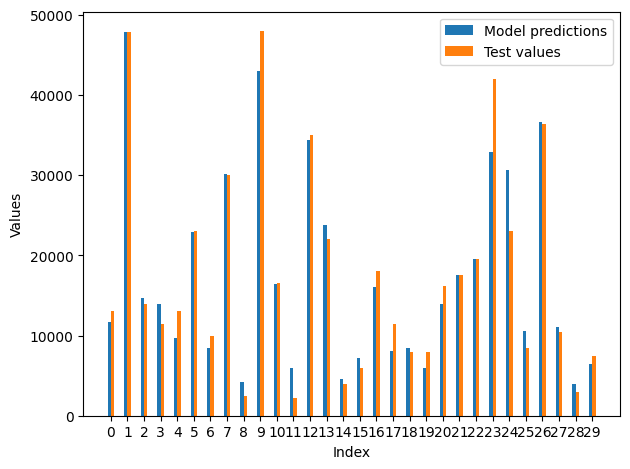

In [78]:
RFGmodel = RandomForestRegressor()
RFGmodel.fit(xtrain,ytrain)

ytest_pred=RFGmodel.predict(xtest)
MSE,MAE,R2 = evaluate(ytest,ytest_pred)

print("The random forest regressor model performance: MSE -> {}, R2 -> {}, MAE -> {}".format(MSE,R2,MAE))

residuals(ytest,ytest_pred)

**LASSO**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.016e+11, tolerance: 3.867e+08
  model = cd_fast.enet_coordinate_descent(


The lasso model performance: MSE -> 27737369.827722304, R2 -> 0.7866653238296842, MAE -> 3704.5547353602665
       index  Model predictions  Test values        error
2850    2850       26625.789739        31988 -5362.210261
1038    1038       18303.442756        10990  7313.442756
11997  11997         -52.864818         3500 -3552.864818
11698  11698        4614.518560         5980 -1365.481440
12085  12085       15584.336220        16800 -1215.663780
9032    9032       11439.150246         8495  2944.150246
8934    8934       14133.988017         8990  5143.988017
7361    7361        7978.039841         8390  -411.960159
4510    4510        1631.782283         4900 -3268.217717
93        93        5813.150283         7225 -1411.849717
7647    7647       13733.037966         7000  6733.037966
5429    5429       23204.343624        20321  2883.343624
4778    4778       11598.778148        11998  -399.221852
6516    6516       12467.644033         7700  4767.644033
6406    6406        88

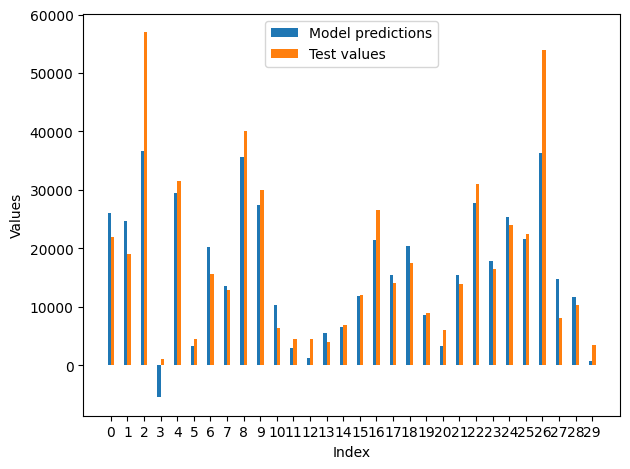

In [79]:
lasso = lm.Lasso(alpha=0.001)
lasso.fit(xtrain,ytrain)

ytest_pred=lasso.predict(xtest)
MSE,MAE,R2 = evaluate(ytest,ytest_pred)

print("The lasso model performance: MSE -> {}, R2 -> {}, MAE -> {}".format(MSE,R2,MAE))

residuals(ytest,ytest_pred)

**SAVING RANDOM FOREST REGRESSOR MODEL**

In [85]:
''' import joblib
joblib.dump(RFGmodel, 'random_forest_regressor_model.pkl') '''

import pickle

with open('df_encoded.pkl', 'wb') as f:
    pickle.dump(df_encoded,f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler,f)

with open('random_forest_regressor_model.pkl','wb') as f:
    pickle.dump(RFGmodel,f)